# EECS731
## Project 1 - Jimmy Wrangler, Data Explorer

Traveling the world on a mission to discover new data
1. Set up a data science project structure in a new git repository in your GitHub account
2. Install Jupyter notebook prerequisites (Anaconda, Python, etc.)
3. Select an industry
4. Select two to three public data sets from that industry
5. Load the data sets into panda data frames following the [10 minutes to pandas guide](https://pandas.pydata.org/pandas-docs/stable/user_guide/10min.html)
6. Formulate one or two ideas on how the data sets could be combined to establish additional value using exploratory data analysis
7. Transform the data sets into a single data set while following data preparation processes to clean and transform features (use [pandas documentation](https://pandas.pydata.org/pandas-docs/stable/index.html) for help)
8. Document your process and results
9. Commit your notebook, source code, visualizations and other supporting files to the git repository in GitHub
<br>
***

In [1]:
from pandas import read_csv , to_datetime , to_numeric, merge, DataFrame, Series, StringDtype
from json import loads, dumps
from ast import literal_eval

from matplotlib.pyplot import figure, show, title, xlabel, ylabel , ticklabel_format, gca, subplots, plot
from matplotlib.ticker import StrMethodFormatter
from matplotlib.dates import DateFormatter

### Data Extraction 
Industry : Movie industry <br>
From https://www.kaggle.com/tmdb/tmdb-movie-metadata (choose tmdb_5000_credits.csv) and from https://www.kaggle.com/rounakbanik/the-movies-dataset (choose movies_metadata.csv) has been saved to the data folder

In [2]:
df_credits = read_csv("./data/tmdb_5000_credits.csv")
df_metadata = read_csv("./data/movies_metadata.csv")

/root/anaconda3/envs/731/lib/python3.6/site-packages/IPython/core/interactiveshell.py:3072: DtypeWarning: Columns (10) have mixed types.Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


In [3]:
# Print out the first 5 of the datasets and columns type
df_credits.head()

,movie_id,title,cast,crew
0,19995,Avatar,"[{""cast_id"": 242, ""character"": ""Jake Sully"", ""...","[{""credit_id"": ""52fe48009251416c750aca23"", ""de..."
1,285,Pirates of the Caribbean: At World's End,"[{""cast_id"": 4, ""character"": ""Captain Jack Spa...","[{""credit_id"": ""52fe4232c3a36847f800b579"", ""de..."
2,206647,Spectre,"[{""cast_id"": 1, ""character"": ""James Bond"", ""cr...","[{""credit_id"": ""54805967c3a36829b5002c41"", ""de..."
3,49026,The Dark Knight Rises,"[{""cast_id"": 2, ""character"": ""Bruce Wayne / Ba...","[{""credit_id"": ""52fe4781c3a36847f81398c3"", ""de..."
4,49529,John Carter,"[{""cast_id"": 5, ""character"": ""John Carter"", ""c...","[{""credit_id"": ""52fe479ac3a36847f813eaa3"", ""de..."


In [4]:
df_credits.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4803 entries, 0 to 4802
Data columns (total 4 columns):
 #   Column    Non-Null Count  Dtype 
---  ------    --------------  ----- 
 0   movie_id  4803 non-null   int64 
 1   title     4803 non-null   object
 2   cast      4803 non-null   object
 3   crew      4803 non-null   object
dtypes: int64(1), object(3)
memory usage: 150.2+ KB


In [5]:
df_metadata.head()

,adult,belongs_to_collection,budget,genres,homepage,id,imdb_id,original_language,original_title,overview,...,release_date,revenue,runtime,spoken_languages,status,tagline,title,video,vote_average,vote_count
0,False,"{'id': 10194, 'name': 'Toy Story Collection', ...",30000000,"[{'id': 16, 'name': 'Animation'}, {'id': 35, '...",http://toystory.disney.com/toy-story,862,tt0114709,en,Toy Story,"Led by Woody, Andy's toys live happily in his ...",...,1995-10-30,373554033.0,81.0,"[{'iso_639_1': 'en', 'name': 'English'}]",Released,NaN,Toy Story,False,7.7,5415.0
1,False,NaN,65000000,"[{'id': 12, 'name': 'Adventure'}, {'id': 14, '...",NaN,8844,tt0113497,en,Jumanji,When siblings Judy and Peter discover an encha...,...,1995-12-15,262797249.0,104.0,"[{'iso_639_1': 'en', 'name': 'English'}, {'iso...",Released,Roll the dice and unleash the excitement!,Jumanji,False,6.9,2413.0
2,False,"{'id': 119050, 'name': 'Grumpy Old Men Collect...",0,"[{'id': 10749, 'name': 'Romance'}, {'id': 35, ...",NaN,15602,tt0113228,en,Grumpier Old Men,A family wedding reignites the ancient feud be...,...,1995-12-22,0.0,101.0,"[{'iso_639_1': 'en', 'name': 'English'}]",Released,Still Yelling. Still Fighting. Still Ready for...,Grumpier Old Men,False,6.5,92.0
3,False,NaN,16000000,"[{'id': 35, 'name': 'Comedy'}, {'id': 18, 'nam...",NaN,31357,tt0114885,en,Waiting to Exhale,"Cheated on, mistreated and stepped on, the wom...",...,1995-12-22,81452156.0,127.0,"[{'iso_639_1': 'en', 'name': 'English'}]",Released,Friends are the people who let you be yourself...,Waiting to Exhale,False,6.1,34.0
4,False,"{'id': 96871, 'name': 'Father of the Bride Col...",0,"[{'id': 35, 'name': 'Comedy'}]",NaN,11862,tt0113041,en,Father of the Bride Part II,Just when George Banks has recovered from his ...,...,1995-02-10,76578911.0,106.0,"[{'iso_639_1': 'en', 'name': 'English'}]",Released,Just When His World Is Back To Normal... He's ...,Father of the Bride Part II,False,5.7,173.0


In [6]:
df_metadata.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 45466 entries, 0 to 45465
Data columns (total 24 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   adult                  45466 non-null  object 
 1   belongs_to_collection  4494 non-null   object 
 2   budget                 45466 non-null  object 
 3   genres                 45466 non-null  object 
 4   homepage               7782 non-null   object 
 5   id                     45466 non-null  object 
 6   imdb_id                45449 non-null  object 
 7   original_language      45455 non-null  object 
 8   original_title         45466 non-null  object 
 9   overview               44512 non-null  object 
 10  popularity             45461 non-null  object 
 11  poster_path            45080 non-null  object 
 12  production_companies   45463 non-null  object 
 13  production_countries   45463 non-null  object 
 14  release_date           45379 non-null  object 
 15  re

In [7]:
df_metadata["production_companies"].iloc[0]

"[{'name': 'Pixar Animation Studios', 'id': 3}]"

***Let's look deeper at the datasets given***<br>
*column_name (type of column) 
    - description*

The df_credits dataset contains the following columns :
- movie_id (int) 
    - A unique id for each movie.
- title (str) 
    - Movie's title
- cast (list of json) 
    - list of actors
    - Json consists of the "cast_id", "character", "credit_id", "gender", "id" , "name" 
- crew (list of json) 
    - list of directors and helpers
    - Json consits of "credit_id", "department", "gender", "id", "job", "name"
<br><br>

The df_metadata dataset contains the following columns :
- adult (str)
    - True or False if it is a adult movie "True"
- belongs_to_collection (json)
    - Json consists of the "id", "name", "poster_path", "backdrop_path"
- budget (str) ***should be int***
    - Amount of US dollars put in the movie
- genres (list of json) 
    - Json consists of the "id" and "name" such as Action
- homepage (string link) 
    - link of movie
- id (str) ***should be int*** ***AND MAYBE same WITH df_credits['movie_id'] dataset***
    -  A unique id for each movie 
- imdb_id (str)
    -  The movie id listed in imdb 
- original_language (str) 
    - Main language of the movie
- original_title (str) 
    - Original title before translating to other language or makeover
- overview (str) 
    - Description of the movie 
- popularity (str) **should be float***
    - TMDB movie popularity 
- poster_path (str)
    - location of jpg poster
- production_companies (list)
    - The company name that produced the movie
    - Json consists of the id" and "name" such as Walt Disney    
- production_countries (list of json)
    - The production company location
    - Json consists of "iso_3166_1" such as "US" and "name" such as United States
- release_date (str) ***should be datetime format*** 
    - yyyy-mm-dd Movie's release date    
- revenue (float)
    - The total amount of money earned in US dollars    
- runtime (float)
    - The length of the movie in minutes    
- spoken_languages (list of json) 
    - language that the actors speak
    - Json consists of "iso_639_1" such as "en" and "name" such as English 
- status (str)
    - Check if the movie has been released or it is just a rumor
- tagline (str)
    - Movie's tagline.
- title (str) **MAYBE same WITH df_credits['title'] dataset***
    - Movie's Title 
- vote_average (float) 
    - Average ratings given by users
- vote_count (float) ***should be int***
    - Amount of vote

## Data Cleaning and Transformation
- Change type to the desired type
- Remove all trailing whites spaces if the columns in object 
- Remove duplicate

### Let's change all data type that needs to be change 

Tried changing id to int by to_numeric <br>
But there is an error on position 19730, let's find out what is going on ! <br>

In [8]:
df_metadata["id"].iloc[19730]

'1997-08-20'

That is bad ! We have a date at the "id" column <br>
#### Is the 19730th row problematic?

In [9]:
df_metadata.iloc[19730]

adult                                                   - Written by Ørnås
belongs_to_collection                                             0.065736
budget                                    /ff9qCepilowshEtG2GYWwzt2bs4.jpg
genres                   [{'name': 'Carousel Productions', 'id': 11176}...
homepage                 [{'iso_3166_1': 'CA', 'name': 'Canada'}, {'iso...
id                                                              1997-08-20
imdb_id                                                                  0
original_language                                                    104.0
original_title                    [{'iso_639_1': 'en', 'name': 'English'}]
overview                                                          Released
popularity                                                             NaN
poster_path                                                   Midnight Man
production_companies                                                 False
production_countries     

We will remove this row as it is problematic 

In [10]:
df_metadata.drop(df_metadata.index[[19730]],inplace=True)

There is still error in position 29502!<br>
We will be using *to_numeric(df_metadata["id"], errors='drop')* instead of *to_numeric(df_metadata["id"])*<br>
It will ***CHANGE*** problematic error to ***NaN*** that contains errors! Easy and fast :) <br>

In [11]:
# Changing data type to numeric
df_metadata["id"] = to_numeric(df_metadata["id"], errors='coerce')
df_metadata["budget"] = to_numeric(df_metadata["budget"],errors='coerce')
df_metadata["popularity"] = to_numeric(df_metadata["popularity"],errors='coerce')
# Changing data type to date
df_metadata["release_date"] = to_datetime(df_metadata["release_date"],errors='coerce')

# Delete all the rows that has NaN in this converted type cols
df_metadata.dropna(subset=["id","budget","popularity","release_date"])

,adult,belongs_to_collection,budget,genres,homepage,id,imdb_id,original_language,original_title,overview,...,release_date,revenue,runtime,spoken_languages,status,tagline,title,video,vote_average,vote_count
0,False,"{'id': 10194, 'name': 'Toy Story Collection', ...",30000000.0,"[{'id': 16, 'name': 'Animation'}, {'id': 35, '...",http://toystory.disney.com/toy-story,862.0,tt0114709,en,Toy Story,"Led by Woody, Andy's toys live happily in his ...",...,1995-10-30,373554033.0,81.0,"[{'iso_639_1': 'en', 'name': 'English'}]",Released,NaN,Toy Story,False,7.7,5415.0
1,False,NaN,65000000.0,"[{'id': 12, 'name': 'Adventure'}, {'id': 14, '...",NaN,8844.0,tt0113497,en,Jumanji,When siblings Judy and Peter discover an encha...,...,1995-12-15,262797249.0,104.0,"[{'iso_639_1': 'en', 'name': 'English'}, {'iso...",Released,Roll the dice and unleash the excitement!,Jumanji,False,6.9,2413.0
2,False,"{'id': 119050, 'name': 'Grumpy Old Men Collect...",0.0,"[{'id': 10749, 'name': 'Romance'}, {'id': 35, ...",NaN,15602.0,tt0113228,en,Grumpier Old Men,A family wedding reignites the ancient feud be...,...,1995-12-22,0.0,101.0,"[{'iso_639_1': 'en', 'name': 'English'}]",Released,Still Yelling. Still Fighting. Still Ready for...,Grumpier Old Men,False,6.5,92.0
3,False,NaN,16000000.0,"[{'id': 35, 'name': 'Comedy'}, {'id': 18, 'nam...",NaN,31357.0,tt0114885,en,Waiting to Exhale,"Cheated on, mistreated and stepped on, the wom...",...,1995-12-22,81452156.0,127.0,"[{'iso_639_1': 'en', 'name': 'English'}]",Released,Friends are the people who let you be yourself...,Waiting to Exhale,False,6.1,34.0
4,False,"{'id': 96871, 'name': 'Father of the Bride Col...",0.0,"[{'id': 35, 'name': 'Comedy'}]",NaN,11862.0,tt0113041,en,Father of the Bride Part II,Just when George Banks has recovered from his ...,...,1995-02-10,76578911.0,106.0,"[{'iso_639_1': 'en', 'name': 'English'}]",Released,Just When His World Is Back To Normal... He's ...,Father of the Bride Part II,False,5.7,173.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
45460,False,NaN,0.0,"[{'id': 18, 'name': 'Drama'}, {'id': 28, 'name...",NaN,30840.0,tt0102797,en,Robin Hood,"Yet another version of the classic epic, with ...",...,1991-05-13,0.0,104.0,"[{'iso_639_1': 'en', 'name': 'English'}]",Released,NaN,Robin Hood,False,5.7,26.0
45462,False,NaN,0.0,"[{'id': 18, 'name': 'Drama'}]",NaN,111109.0,tt2028550,tl,Siglo ng Pagluluwal,An artist struggles to finish his work while a...,...,2011-11-17,0.0,360.0,"[{'iso_639_1': 'tl', 'name': ''}]",Released,NaN,Century of Birthing,False,9.0,3.0
45463,False,NaN,0.0,"[{'id': 28, 'name': 'Action'}, {'id': 18, 'nam...",NaN,67758.0,tt0303758,en,Betrayal,"When one of her hits goes wrong, a professiona...",...,2003-08-01,0.0,90.0,"[{'iso_639_1': 'en', 'name': 'English'}]",Released,A deadly game of wits.,Betrayal,False,3.8,6.0
45464,False,NaN,0.0,[],NaN,227506.0,tt0008536,en,Satana likuyushchiy,"In a small town live two brothers, one a minis...",...,1917-10-21,0.0,87.0,[],Released,NaN,Satan Triumphant,False,0.0,0.0


We finish 1st bullet point !

In [12]:
# Remove all trailing whites spaces if the columns in object 
df_credits = df_credits.applymap(lambda x: x.strip() if isinstance(x, str) else x)
df_metadata = df_metadata.applymap(lambda x: x.strip() if isinstance(x, str) else x)
# Remove duplicate
df_credits.drop_duplicates(keep='last',inplace=True)
df_metadata.drop_duplicates(keep='last',inplace=True)

### Which columns to merge with? <br>
We are looking towards _"id"_ or _"title"_ (Read the markdown on the above that has details of each column type)

In [13]:
df_credits.iloc[0]

movie_id                                                19995
title                                                  Avatar
cast        [{"cast_id": 242, "character": "Jake Sully", "...
crew        [{"credit_id": "52fe48009251416c750aca23", "de...
Name: 0, dtype: object

In [14]:
df_metadata.loc[df_metadata["id"] == 19995]

,adult,belongs_to_collection,budget,genres,homepage,id,imdb_id,original_language,original_title,overview,...,release_date,revenue,runtime,spoken_languages,status,tagline,title,video,vote_average,vote_count
14551,False,"{'id': 87096, 'name': 'Avatar Collection', 'po...",237000000.0,"[{'id': 28, 'name': 'Action'}, {'id': 12, 'nam...",http://www.avatarmovie.com/,19995.0,tt0499549,en,Avatar,"In the 22nd century, a paraplegic Marine is di...",...,2009-12-10,2.787965e+09,162.0,"[{'iso_639_1': 'en', 'name': 'English'}, {'iso...",Released,Enter the World of Pandora.,Avatar,False,7.2,12114.0


Sweet! It matched title is the same! <br> 
#### Let's Merge <br>

In [15]:
# Merge this way instead of left.merge(right, on='key', how='inner') 
# Because column name is different
df_merged = merge(df_credits, df_metadata, left_on='movie_id', right_on='id')
df_merged

,movie_id,title_x,cast,crew,adult,belongs_to_collection,budget,genres,homepage,id,...,release_date,revenue,runtime,spoken_languages,status,tagline,title_y,video,vote_average,vote_count
0,19995,Avatar,"[{""cast_id"": 242, ""character"": ""Jake Sully"", ""...","[{""credit_id"": ""52fe48009251416c750aca23"", ""de...",False,"{'id': 87096, 'name': 'Avatar Collection', 'po...",237000000.0,"[{'id': 28, 'name': 'Action'}, {'id': 12, 'nam...",http://www.avatarmovie.com/,19995.0,...,2009-12-10,2.787965e+09,162.0,"[{'iso_639_1': 'en', 'name': 'English'}, {'iso...",Released,Enter the World of Pandora.,Avatar,False,7.2,12114.0
1,285,Pirates of the Caribbean: At World's End,"[{""cast_id"": 4, ""character"": ""Captain Jack Spa...","[{""credit_id"": ""52fe4232c3a36847f800b579"", ""de...",False,"{'id': 295, 'name': 'Pirates of the Caribbean ...",300000000.0,"[{'id': 12, 'name': 'Adventure'}, {'id': 14, '...",http://disney.go.com/disneypictures/pirates/,285.0,...,2007-05-19,9.610000e+08,169.0,"[{'iso_639_1': 'en', 'name': 'English'}]",Released,"At the end of the world, the adventure begins.",Pirates of the Caribbean: At World's End,False,6.9,4627.0
2,206647,Spectre,"[{""cast_id"": 1, ""character"": ""James Bond"", ""cr...","[{""credit_id"": ""54805967c3a36829b5002c41"", ""de...",False,"{'id': 645, 'name': 'James Bond Collection', '...",245000000.0,"[{'id': 28, 'name': 'Action'}, {'id': 12, 'nam...",http://www.sonypictures.com/movies/spectre/,206647.0,...,2015-10-26,8.806746e+08,148.0,"[{'iso_639_1': 'fr', 'name': 'Français'}, {'is...",Released,A Plan No One Escapes,Spectre,False,6.3,4552.0
3,49026,The Dark Knight Rises,"[{""cast_id"": 2, ""character"": ""Bruce Wayne / Ba...","[{""credit_id"": ""52fe4781c3a36847f81398c3"", ""de...",False,"{'id': 263, 'name': 'The Dark Knight Collectio...",250000000.0,"[{'id': 28, 'name': 'Action'}, {'id': 80, 'nam...",http://www.thedarkknightrises.com/,49026.0,...,2012-07-16,1.084939e+09,165.0,"[{'iso_639_1': 'en', 'name': 'English'}]",Released,The Legend Ends,The Dark Knight Rises,False,7.6,9263.0
4,49529,John Carter,"[{""cast_id"": 5, ""character"": ""John Carter"", ""c...","[{""credit_id"": ""52fe479ac3a36847f813eaa3"", ""de...",False,NaN,260000000.0,"[{'id': 28, 'name': 'Action'}, {'id': 12, 'nam...",http://movies.disney.com/john-carter,49529.0,...,2012-03-07,2.841391e+08,132.0,"[{'iso_639_1': 'en', 'name': 'English'}]",Released,"Lost in our world, found in another.",John Carter,False,6.1,2170.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4594,9367,El Mariachi,"[{""cast_id"": 1, ""character"": ""El Mariachi"", ""c...","[{""credit_id"": ""52fe44eec3a36847f80b280b"", ""de...",False,"{'id': 9649, 'name': 'Mexico Trilogy', 'poster...",220000.0,"[{'id': 28, 'name': 'Action'}, {'id': 80, 'nam...",NaN,9367.0,...,1992-09-04,2.040920e+06,81.0,"[{'iso_639_1': 'es', 'name': 'Español'}]",Released,"He didn't come looking for trouble, but troubl...",El Mariachi,False,6.6,243.0
4595,72766,Newlyweds,"[{""cast_id"": 1, ""character"": ""Buzzy"", ""credit_...","[{""credit_id"": ""52fe487dc3a368484e0fb013"", ""de...",False,NaN,9000.0,"[{'id': 35, 'name': 'Comedy'}, {'id': 10749, '...",NaN,72766.0,...,2011-12-26,0.000000e+00,85.0,[],Released,A newlywed couple's honeymoon is upended by th...,Newlyweds,False,5.6,6.0
4596,231617,"Signed, Sealed, Delivered","[{""cast_id"": 8, ""character"": ""Oliver O\u2019To...","[{""credit_id"": ""52fe4df3c3a36847f8275ecf"", ""de...",False,"{'id': 418326, 'name': 'Signed, Sealed, Delive...",0.0,"[{'id': 35, 'name': 'Comedy'}, {'id': 18, 'nam...",http://www.hallmarkchannel.com/signedsealeddel...,231617.0,...,2013-10-13,0.000000e+00,120.0,"[{'iso_639_1': 'en', 'name': 'English'}]",Released,NaN,"Signed, Sealed, Delivered",False,7.0,6.0
4597,126186,Shanghai Calling,"[{""cast_id"": 3, ""character"": ""Sam"", ""credit_id...","[{""credit_id"": ""52fe4ad9c3a368484e16a36b"", ""de...",False,NaN,0.0,[],http://shanghaicalling.com/,126186.0,...,2012-05-03,0.000000e+0

### Drop some rows that we do not use!

In [16]:
df_merged.drop(["production_countries","production_companies"], axis=1, inplace=True)
df_merged.head()

,movie_id,title_x,cast,crew,adult,belongs_to_collection,budget,genres,homepage,id,...,release_date,revenue,runtime,spoken_languages,status,tagline,title_y,video,vote_average,vote_count
0,19995,Avatar,"[{""cast_id"": 242, ""character"": ""Jake Sully"", ""...","[{""credit_id"": ""52fe48009251416c750aca23"", ""de...",False,"{'id': 87096, 'name': 'Avatar Collection', 'po...",237000000.0,"[{'id': 28, 'name': 'Action'}, {'id': 12, 'nam...",http://www.avatarmovie.com/,19995.0,...,2009-12-10,2.787965e+09,162.0,"[{'iso_639_1': 'en', 'name': 'English'}, {'iso...",Released,Enter the World of Pandora.,Avatar,False,7.2,12114.0
1,285,Pirates of the Caribbean: At World's End,"[{""cast_id"": 4, ""character"": ""Captain Jack Spa...","[{""credit_id"": ""52fe4232c3a36847f800b579"", ""de...",False,"{'id': 295, 'name': 'Pirates of the Caribbean ...",300000000.0,"[{'id': 12, 'name': 'Adventure'}, {'id': 14, '...",http://disney.go.com/disneypictures/pirates/,285.0,...,2007-05-19,9.610000e+08,169.0,"[{'iso_639_1': 'en', 'name': 'English'}]",Released,"At the end of the world, the adventure begins.",Pirates of the Caribbean: At World's End,False,6.9,4627.0
2,206647,Spectre,"[{""cast_id"": 1, ""character"": ""James Bond"", ""cr...","[{""credit_id"": ""54805967c3a36829b5002c41"", ""de...",False,"{'id': 645, 'name': 'James Bond Collection', '...",245000000.0,"[{'id': 28, 'name': 'Action'}, {'id': 12, 'nam...",http://www.sonypictures.com/movies/spectre/,206647.0,...,2015-10-26,8.806746e+08,148.0,"[{'iso_639_1': 'fr', 'name': 'Français'}, {'is...",Released,A Plan No One Escapes,Spectre,False,6.3,4552.0
3,49026,The Dark Knight Rises,"[{""cast_id"": 2, ""character"": ""Bruce Wayne / Ba...","[{""credit_id"": ""52fe4781c3a36847f81398c3"", ""de...",False,"{'id': 263, 'name': 'The Dark Knight Collectio...",250000000.0,"[{'id': 28, 'name': 'Action'}, {'id': 80, 'nam...",http://www.thedarkknightrises.com/,49026.0,...,2012-07-16,1.084939e+09,165.0,"[{'iso_639_1': 'en', 'name': 'English'}]",Released,The Legend Ends,The Dark Knight Rises,False,7.6,9263.0
4,49529,John Carter,"[{""cast_id"": 5, ""character"": ""John Carter"", ""c...","[{""credit_id"": ""52fe479ac3a36847f813eaa3"", ""de...",False,NaN,260000000.0,"[{'id': 28, 'name': 'Action'}, {'id': 12, 'nam...",http://movies.disney.com/john-carter,49529.0,...,2012-03-07,2.841391e+08,132.0,"[{'iso_639_1': 'en', 'name': 'English'}]",Released,"Lost in our world, found in another.",John Carter,False,6.1,2170.0


We have to change all list of json to list for easier usage <br>
Columns with list of json type :<br>
cast, crew, genres, spoken_languages <br>
But first, as you can see below : 


In [17]:
df_merged["genres"].iloc[0]

"[{'id': 28, 'name': 'Action'}, {'id': 12, 'name': 'Adventure'}, {'id': 14, 'name': 'Fantasy'}, {'id': 878, 'name': 'Science Fiction'}]"

*When using json.loads , json should be enclosed in double quotes " not single quotes ' !!!!*

### Data transfomation from list of json to list

In [18]:
def to_important_list(df: DataFrame, column_name: str, key: str) -> None:
    """Remove useless keys in a list of json and
        only use one key that will be kept in a list

    Args:
        df:
        DataFrame that we want to transform
        
        column_name: 
        str column name that has list of json type
    
        key:
        str the key that is important that we want to keep
    
    Returns:
        None

   """
    for index, list_of_json in zip( df.index , df[column_name]):
        new_list = []
        # Make list_of_json( current type is str) to list
        list_of_json = loads(list_of_json)

        for i in range(len(list_of_json)):
            json = list_of_json[i]
            new_list.append( json[key])
        # Have to save the new_list to str due to error saving in a list
        df.loc[index, column_name] = str(new_list)
        
    # Change the list (type str) to list
    df[column_name] = df[column_name].apply(literal_eval)
    
    return df

cols_with_list_of_json = ["cast", "crew", "genres","spoken_languages"]

for col_name in cols_with_list_of_json:
    
    # naive approach to fix json.loads json should be enclosed in double quotes error
    if (col_name == "genres" or col_name == "spoken_languages"):
        df_merged[col_name] = df_merged[col_name].str.replace("'", '"').astype('string')
    # Luckily, all the key that are important to use are "name" for all the cols
    df_merged = to_important_list(df_merged, col_name, "name")
    

df_merged

,movie_id,title_x,cast,crew,adult,belongs_to_collection,budget,genres,homepage,id,...,release_date,revenue,runtime,spoken_languages,status,tagline,title_y,video,vote_average,vote_count
0,19995,Avatar,"[Sam Worthington, Zoe Saldana, Sigourney Weave...","[Stephen E. Rivkin, Rick Carter, Christopher B...",False,"{'id': 87096, 'name': 'Avatar Collection', 'po...",237000000.0,"[Action, Adventure, Fantasy, Science Fiction]",http://www.avatarmovie.com/,19995.0,...,2009-12-10,2.787965e+09,162.0,"[English, Español]",Released,Enter the World of Pandora.,Avatar,False,7.2,12114.0
1,285,Pirates of the Caribbean: At World's End,"[Johnny Depp, Orlando Bloom, Keira Knightley, ...","[Dariusz Wolski, Gore Verbinski, Jerry Bruckhe...",False,"{'id': 295, 'name': 'Pirates of the Caribbean ...",300000000.0,"[Adventure, Fantasy, Action]",http://disney.go.com/disneypictures/pirates/,285.0,...,2007-05-19,9.610000e+08,169.0,[English],Released,"At the end of the world, the adventure begins.",Pirates of the Caribbean: At World's End,False,6.9,4627.0
2,206647,Spectre,"[Daniel Craig, Christoph Waltz, Léa Seydoux, R...","[Thomas Newman, Sam Mendes, Anna Pinnock, John...",False,"{'id': 645, 'name': 'James Bond Collection', '...",245000000.0,"[Action, Adventure, Crime]",http://www.sonypictures.com/movies/spectre/,206647.0,...,2015-10-26,8.806746e+08,148.0,"[Français, English, Español, Italiano, Deutsch]",Released,A Plan No One Escapes,Spectre,False,6.3,4552.0
3,49026,The Dark Knight Rises,"[Christian Bale, Michael Caine, Gary Oldman, A...","[Hans Zimmer, Charles Roven, Christopher Nolan...",False,"{'id': 263, 'name': 'The Dark Knight Collectio...",250000000.0,"[Action, Crime, Drama, Thriller]",http://www.thedarkknightrises.com/,49026.0,...,2012-07-16,1.084939e+09,165.0,[English],Released,The Legend Ends,The Dark Knight Rises,False,7.6,9263.0
4,49529,John Carter,"[Taylor Kitsch, Lynn Collins, Samantha Morton,...","[Andrew Stanton, Andrew Stanton, John Lasseter...",False,NaN,260000000.0,"[Action, Adventure, Science Fiction]",http://movies.disney.com/john-carter,49529.0,...,2012-03-07,2.841391e+08,132.0,[English],Released,"Lost in our world, found in another.",John Carter,False,6.1,2170.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4594,9367,El Mariachi,"[Carlos Gallardo, Jaime de Hoyos, Peter Marqua...","[Robert Rodriguez, Robert Rodriguez, Robert Ro...",False,"{'id': 9649, 'name': 'Mexico Trilogy', 'poster...",220000.0,"[Action, Crime, Thriller]",NaN,9367.0,...,1992-09-04,2.040920e+06,81.0,[Español],Released,"He didn't come looking for trouble, but troubl...",El Mariachi,False,6.6,243.0
4595,72766,Newlyweds,"[Edward Burns, Kerry Bishé, Marsha Dietlein, C...","[Edward Burns, Edward Burns, Edward Burns, Wil...",False,NaN,9000.0,"[Comedy, Romance]",NaN,72766.0,...,2011-12-26,0.000000e+00,85.0,[],Released,A newlywed couple's honeymoon is upended by th...,Newlyweds,False,5.6,6.0
4596,231617,"Signed, Sealed, Delivered","[Eric Mabius, Kristin Booth, Crystal Lowe, Geo...","[Carla Hetland, Harvey Kahn, Adam Sliwinski, M...",False,"{'id': 418326, 'name': 'Signed, Sealed, Delive...",0.0,"[Comedy, Drama, Romance, TV Movie]",http://www.hallmarkchannel.com/signedsealeddel...,231617.0,...,2013-10-13,0.000000e+00,120.0,[English],Released,NaN,"Signed, Sealed, Delivered",False,7.0,6.0
4597,126186,Shanghai Calling,"[Daniel Henney, Eliza Coupe, Bill Paxton, Alan...","[Daniel Hsia, Daniel Hsia]",False,NaN,0.0,[],http://shanghaicalling.com/,126186.0,...,2012-05-03,0.000000e+00,98.0,[English],Released,A New Yorker in Shanghai,Shanghai Calling,False,5.7,7.0


Data looks better and easier to play with! <br>


For question 6 ***(Formulate one or two ideas on how the data sets could be combined to establish additional value using exploratory data analysis)***: <br>

My idea was to 
# What kind of movie generate profit? <br>
But, first let's do count the profit!

In [19]:
df_merged["profit"] = df_merged["revenue"] - df_merged["budget"]

### What are the top 10 highest profit movie?

In [20]:
# Top 10 highest profit 
df_top10_profit = df_merged.nlargest(10,["profit"])

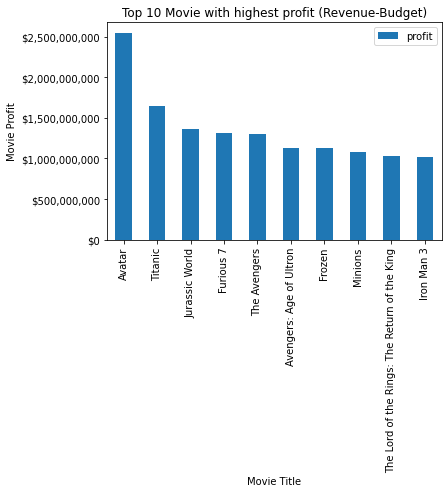

In [21]:
# Plot top 10 movie with highest profit
f = figure()
ticklabel_format(style = 'plain')
df_top10_profit.plot(x="title_x", y="profit", kind ="bar", ax=f.gca())
f.gca().yaxis.set_major_formatter(StrMethodFormatter("${x:,.0f}"))

title("Top 10 Movie with highest profit (Revenue-Budget)")
xlabel('Movie Title')
ylabel('Movie Profit')
show()

### Which year has the most profit?

The highest profit (the orange dot) is :
Year: 2012, Most Profit: $16,899,433,353.00


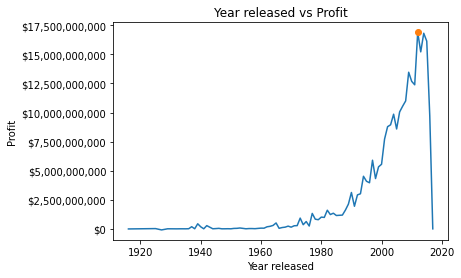

In [22]:
series_profit_year = df_merged.groupby(df_merged.release_date.dt.year).sum()["profit"] 

# Plot Year released vs Profit
fig, ax = subplots()
fig.gca().yaxis.set_major_formatter(StrMethodFormatter("${x:,.0f}"))
series_profit_year.plot(ax=ax)

print("The highest profit (the orange dot) is :")
series_highest_profit_year = series_profit_year.nlargest(1)
y_max = series_highest_profit_year.iloc[0]
x_max = series_highest_profit_year.index[0]
print(f"Year: {x_max}, Most Profit: ${y_max:,.2f}")

# Plot a marker to indicate where the max profit is 
plot(x_max, y_max, "-o")

title("Year released vs Profit")
xlabel("Year released")
ylabel("Profit")
show()

### Amount of revenue and profit are related?

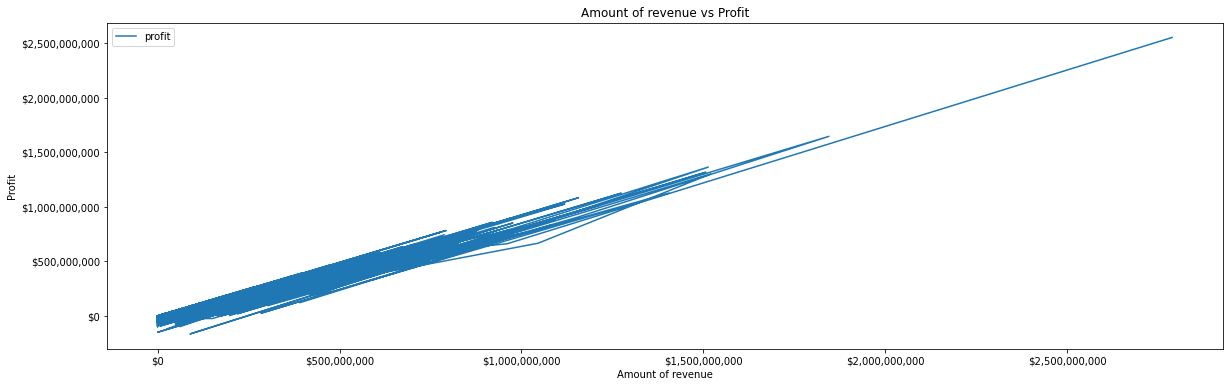

In [23]:
# Plot amount of revenue vs profit
f = figure(figsize=(20,6))
ticklabel_format(style = 'plain')
df_merged.plot(x="revenue", y="profit", kind ="line", ax=f.gca())
f.gca().yaxis.set_major_formatter(StrMethodFormatter("${x:,.0f}"))
f.gca().xaxis.set_major_formatter(StrMethodFormatter("${x:,.0f}"))

title("Amount of revenue vs Profit")
xlabel("Amount of revenue")
ylabel("Profit")
show()

We can see tha that there is a postive correlation<br>
***The more the revenue, the more profit you will gain!***

### When is the best time to release your movie?
Let's get only the released movie by the status column in the dataframe

In [24]:
# Released Movie Dataframe
df_released_movie = df_merged.loc[df_merged["status"] == "Released"]


The most popular month of release (the orange dot) is :
Month: 9, Number of released: 570


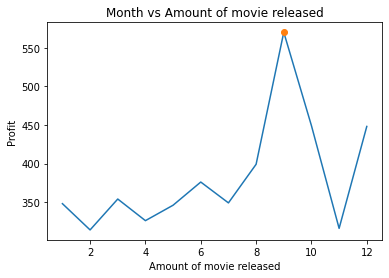

In [25]:
series_num_released_movie = df_released_movie.groupby(df_released_movie.release_date.dt.month).count()["title_x"]

# Plot num month vs amount of movie released at that month
fig, ax = subplots()
series_num_released_movie.plot(ax=ax)

print("The most popular month of release (the orange dot) is :")
series_highest_num_released_movie = series_num_released_movie.nlargest(1)
y_max = series_highest_num_released_movie.iloc[0]
x_max = series_highest_num_released_movie.index[0]
print(f"Month: {int(x_max)}, Number of released: {y_max}")

# Plot a marker to indicate where the max profit is 
plot(x_max, y_max, "-o")

title("Month vs Amount of movie released")
xlabel("Amount of movie released")
ylabel("Profit")
show()

### Top 10 actors with most movie

The column cast is a list
So, for easier data manipulation, we will 
## Create a row for each list element

In [26]:
df_merged["cast"]

0       [Sam Worthington, Zoe Saldana, Sigourney Weave...
1       [Johnny Depp, Orlando Bloom, Keira Knightley, ...
2       [Daniel Craig, Christoph Waltz, Léa Seydoux, R...
3       [Christian Bale, Michael Caine, Gary Oldman, A...
4       [Taylor Kitsch, Lynn Collins, Samantha Morton,...
                              ...                        
4594    [Carlos Gallardo, Jaime de Hoyos, Peter Marqua...
4595    [Edward Burns, Kerry Bishé, Marsha Dietlein, C...
4596    [Eric Mabius, Kristin Booth, Crystal Lowe, Geo...
4597    [Daniel Henney, Eliza Coupe, Bill Paxton, Alan...
4598    [Drew Barrymore, Brian Herzlinger, Corey Feldm...
Name: cast, Length: 4599, dtype: object

In [27]:
series_cast = df_merged.apply(lambda x: Series(x['cast']),axis=1)
series_cast = series_cast.stack().reset_index(level=1, drop=True)
series_cast.name = "cast"
series_cast

/root/anaconda3/envs/731/lib/python3.6/site-packages/ipykernel_launcher.py:1: DeprecationWarning: The default dtype for empty Series will be 'object' instead of 'float64' in a future version. Specify a dtype explicitly to silence this warning.
  """Entry point for launching an IPython kernel.


0          Sam Worthington
0              Zoe Saldana
0         Sigourney Weaver
0             Stephen Lang
0       Michelle Rodriguez
               ...        
4598          Eric Roberts
4598         Griffin Dunne
4598     Samuel L. Jackson
4598          Matt LeBlanc
4598           Bill D'Elia
Name: cast, Length: 104611, dtype: object

In [28]:
df_most_movie = df_merged.drop('cast',axis=1).join(series_cast)
df_most_movie

,movie_id,title_x,crew,adult,belongs_to_collection,budget,genres,homepage,id,imdb_id,...,runtime,spoken_languages,status,tagline,title_y,video,vote_average,vote_count,profit,cast
0,19995,Avatar,"[Stephen E. Rivkin, Rick Carter, Christopher B...",False,"{'id': 87096, 'name': 'Avatar Collection', 'po...",237000000.0,"[Action, Adventure, Fantasy, Science Fiction]",http://www.avatarmovie.com/,19995.0,tt0499549,...,162.0,"[English, Español]",Released,Enter the World of Pandora.,Avatar,False,7.2,12114.0,2.550965e+09,Sam Worthington
0,19995,Avatar,"[Stephen E. Rivkin, Rick Carter, Christopher B...",False,"{'id': 87096, 'name': 'Avatar Collection', 'po...",237000000.0,"[Action, Adventure, Fantasy, Science Fiction]",http://www.avatarmovie.com/,19995.0,tt0499549,...,162.0,"[English, Español]",Released,Enter the World of Pandora.,Avatar,False,7.2,12114.0,2.550965e+09,Zoe Saldana
0,19995,Avatar,"[Stephen E. Rivkin, Rick Carter, Christopher B...",False,"{'id': 87096, 'name': 'Avatar Collection', 'po...",237000000.0,"[Action, Adventure, Fantasy, Science Fiction]",http://www.avatarmovie.com/,19995.0,tt0499549,...,162.0,"[English, Español]",Released,Enter the World of Pandora.,Avatar,False,7.2,12114.0,2.550965e+09,Sigourney Weaver
0,19995,Avatar,"[Stephen E. Rivkin, Rick Carter, Christopher B...",False,"{'id': 87096, 'name': 'Avatar Collection', 'po...",237000000.0,"[Action, Adventure, Fantasy, Science Fiction]",http://www.avatarmovie.com/,19995.0,tt0499549,...,162.0,"[English, Español]",Released,Enter the World of Pandora.,Avatar,False,7.2,12114.0,2.550965e+09,Stephen Lang
0,19995,Avatar,"[Stephen E. Rivkin, Rick Carter, Christopher B...",False,"{'id': 87096, 'name': 'Avatar Collection', 'po...",237000000.0,"[Action, Adventure, Fantasy, Science Fiction]",http://www.avatarmovie.com/,19995.0,tt0499549,...,162.0,"[English, Español]",Released,Enter the World of Pandora.,Avatar,False,7.2,12114.0,2.550965e+09,Michelle Rodriguez
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4598,25975,My Date with Drew,"[Clark Peterson, Andrew Reimer, Brian Herzling...",False,NaN,0.0,[Documentary],NaN,25975.0,tt0378407,...,90.0,[English],Released,NaN,My Date with Drew,False,6.3,16.0,0.000000e+00,Eric Roberts
4598,25975,My Date with Drew,"[Clark Peterson, Andrew Reimer, Brian Herzling...",False,NaN,0.0,[Documentary],NaN,25975.0,tt0378407,...,90.0,[English],Released,NaN,My Date with Drew,False,6.3,16.0,0.000000e+00,Griffin Dunne
4598,25975,My Date with Drew,"[Clark Peterson, Andrew Reimer, Brian Herzling...",False,NaN,0.0,[Documentary],NaN,25975.0,tt0378407,...,90.0,[English],Released,NaN,My Date with Drew,False,6.3,16.0,0.000000e+00,Samuel L. Jackson
4598,25975,My Date with Drew,"[Clark Peterson, Andrew Reimer, Brian Herzling...",False,NaN,0.0,[Documentary],NaN,25975.0,tt0378407,...,90.0,[English],Released,NaN,My Date with Drew,False,6.3,16.0,0.000000e+00,Matt LeBlanc


***We want a sequential index !***

In [29]:
df_most_movie = df_most_movie.reset_index()
df_most_movie

,index,movie_id,title_x,crew,adult,belongs_to_collection,budget,genres,homepage,id,...,runtime,spoken_languages,status,tagline,title_y,video,vote_average,vote_count,profit,cast
0,0,19995,Avatar,"[Stephen E. Rivkin, Rick Carter, Christopher B...",False,"{'id': 87096, 'name': 'Avatar Collection', 'po...",237000000.0,"[Action, Adventure, Fantasy, Science Fiction]",http://www.avatarmovie.com/,19995.0,...,162.0,"[English, Español]",Released,Enter the World of Pandora.,Avatar,False,7.2,12114.0,2.550965e+09,Sam Worthington
1,0,19995,Avatar,"[Stephen E. Rivkin, Rick Carter, Christopher B...",False,"{'id': 87096, 'name': 'Avatar Collection', 'po...",237000000.0,"[Action, Adventure, Fantasy, Science Fiction]",http://www.avatarmovie.com/,19995.0,...,162.0,"[English, Español]",Released,Enter the World of Pandora.,Avatar,False,7.2,12114.0,2.550965e+09,Zoe Saldana
2,0,19995,Avatar,"[Stephen E. Rivkin, Rick Carter, Christopher B...",False,"{'id': 87096, 'name': 'Avatar Collection', 'po...",237000000.0,"[Action, Adventure, Fantasy, Science Fiction]",http://www.avatarmovie.com/,19995.0,...,162.0,"[English, Español]",Released,Enter the World of Pandora.,Avatar,False,7.2,12114.0,2.550965e+09,Sigourney Weaver
3,0,19995,Avatar,"[Stephen E. Rivkin, Rick Carter, Christopher B...",False,"{'id': 87096, 'name': 'Avatar Collection', 'po...",237000000.0,"[Action, Adventure, Fantasy, Science Fiction]",http://www.avatarmovie.com/,19995.0,...,162.0,"[English, Español]",Released,Enter the World of Pandora.,Avatar,False,7.2,12114.0,2.550965e+09,Stephen Lang
4,0,19995,Avatar,"[Stephen E. Rivkin, Rick Carter, Christopher B...",False,"{'id': 87096, 'name': 'Avatar Collection', 'po...",237000000.0,"[Action, Adventure, Fantasy, Science Fiction]",http://www.avatarmovie.com/,19995.0,...,162.0,"[English, Español]",Released,Enter the World of Pandora.,Avatar,False,7.2,12114.0,2.550965e+09,Michelle Rodriguez
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
104626,4598,25975,My Date with Drew,"[Clark Peterson, Andrew Reimer, Brian Herzling...",False,NaN,0.0,[Documentary],NaN,25975.0,...,90.0,[English],Released,NaN,My Date with Drew,False,6.3,16.0,0.000000e+00,Eric Roberts
104627,4598,25975,My Date with Drew,"[Clark Peterson, Andrew Reimer, Brian Herzling...",False,NaN,0.0,[Documentary],NaN,25975.0,...,90.0,[English],Released,NaN,My Date with Drew,False,6.3,16.0,0.000000e+00,Griffin Dunne
104628,4598,25975,My Date with Drew,"[Clark Peterson, Andrew Reimer, Brian Herzling...",False,NaN,0.0,[Documentary],NaN,25975.0,...,90.0,[English],Released,NaN,My Date with Drew,False,6.3,16.0,0.000000e+00,Samuel L. Jackson
104629,4598,25975,My Date with Drew,"[Clark Peterson, Andrew Reimer, Brian Herzling...",False,NaN,0.0,[Documentary],NaN,25975.0,...,90.0,[English],Released,NaN,My Date with Drew,False,6.3,16.0,0.000000e+00,Matt LeBlanc


In [30]:
series_cast_most_movie = df_most_movie.groupby("cast").size()
series_cast_most_movie = series_cast_most_movie.nlargest(10)
series_cast_most_movie

cast
Samuel L. Jackson    67
Robert De Niro       57
Bruce Willis         50
Matt Damon           49
Morgan Freeman       46
Steve Buscemi        43
Liam Neeson          41
Johnny Depp          40
Owen Wilson          40
Alec Baldwin         39
dtype: int64

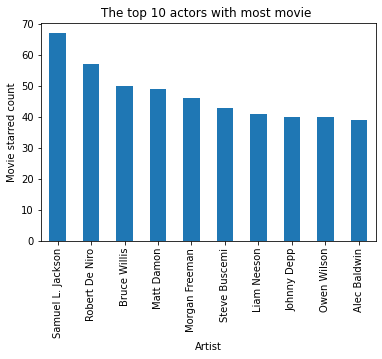

In [31]:
# Plot SERIES top 10 actors with most movie
fig, ax = subplots()
series_cast_most_movie.plot(ax=ax,kind="bar")

title("The top 10 actors with most movie ")
xlabel("Artist")
ylabel("Movie starred count")
show()

### Top 10 artist that generate the most profit

In [32]:
series_cast_profit = df_most_movie.groupby("cast")["profit"].sum().nlargest(10)
series_cast_profit

cast
Stan Lee             1.301806e+10
Samuel L. Jackson    1.081007e+10
Frank Welker         8.978337e+09
John Ratzenberger    8.548045e+09
Hugo Weaving         8.312191e+09
Jess Harnell         7.666958e+09
Ian McKellen         7.285670e+09
Cate Blanchett       7.241739e+09
Christopher Lee      7.004190e+09
Tom Hanks            6.836321e+09
Name: profit, dtype: float64

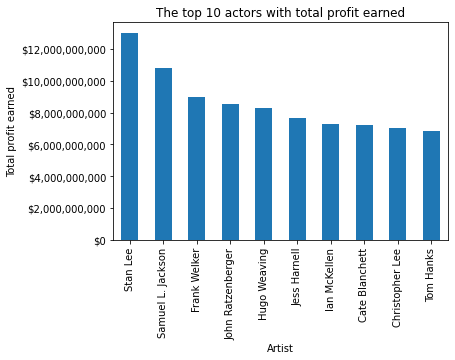

In [33]:
# Plot SERIES top 10 actors with most movie
fig, ax = subplots()
series_cast_profit.plot(ax=ax,kind="bar")
fig.gca().yaxis.set_major_formatter(StrMethodFormatter("${x:,.0f}"))

title("The top 10 actors with total profit earned")
xlabel("Artist")
ylabel("Total profit earned")
show()

The data doesnt seems fair because artists such as Samuel L. Jackson has a lot of movies<br>
Let's do a new data exploration ! <br>
$$
\frac{the  total  of  profit}{total  of  movie  starred}\ 
$$which is the ***average***

/root/anaconda3/envs/731/lib/python3.6/site-packages/pandas/plotting/_matplotlib/core.py:1235: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_xticklabels(xticklabels)


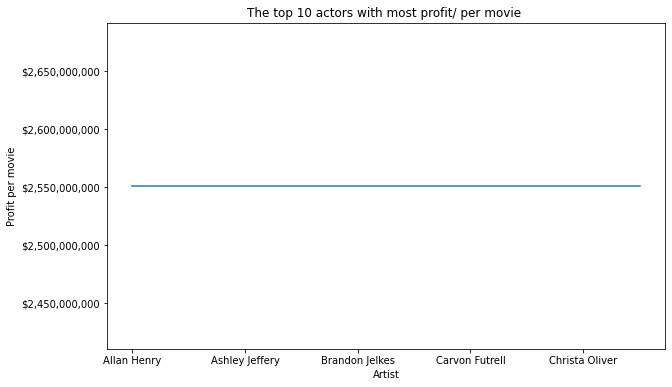

In [34]:
series_cast_profit = df_most_movie.groupby("cast")["profit"].mean().nlargest(10)

# Plot SERIES top 10 actors with most movie
fig, ax = subplots(figsize=(10,6))
series_cast_profit.plot(ax=ax,kind="line")
fig.gca().yaxis.set_major_formatter(StrMethodFormatter("${x:,.0f}"))

title("The top 10 actors with most profit/ per movie ")
xlabel("Artist")
ylabel("Profit per movie")
show()

We cannot use this data because there could be 1 artist that is starring at only 1 movie that have high profit ! <br> We will ***throw*** this data exploration. <br>

Top 10 actors with total profit earned seemed more reliable!<br>
***

# Summary of Data Exploration
## What kind of movie produce profit?
- Movies like avatar, titanic, jurrasic world , etc (Top 10 most profittable movie list) produce a lot of profit
- Movies that are generated at 2012 generated the most profit
- Movies that higher revenue tends to generate more profit
- Avoid releasing movie in 9th month where there are a lot competition - a lot of movies are released during this time!
- Top 10 popular artists are Samuel L. Jackson, Robert De Niiro, etc.
- Top 10 actors with total profit earned are Samuel L. Jackson, Stan Lee

# Limitations of datasets
- The merge dataframe only has 4599 rows
- Top 10 actors with total profit doesnt seems fair because artists such as Samuel L. Jackson has a lot of movies and Stan Lee only has one or two minute of runtime and the pay for each artist could differ in a movie